<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
کلاهبرداری پیاز جعفری
</font>
</h1>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
بخش ۱
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در سرزمین‌های دور پس از دوره‌ای گرانی، یک شرکت تولیدکننده‌ی تنقلات تصمیم گرفت تا به کم‌فروشی بپردازد و میزان چپیس کمتری را در بسته‌های چیپس ۴۰۰ گرمی خود قرار دهد. فردی بیکار و پولدار و البته بادغدغه در این بین، پس از مدتی مشاهده، به میزان وزن چپیس‌ها مشکوک شد.
<br>
این فرد پس از مدتی تصمیم گرفت تا تعدادی چیپس را بخرد و وزن آن‌ها را اندازه گیری کند. این فرد اندازه‌ی این بسته‌چپیس‌ها را در لیست زیر ریخته است:
</font>
</p>

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">


In [1]:
weights = [325, 330, 389, 370, 378, 385, 368, 392, 374, 380, 295, 310, 340, 350, 363, 490,
           376, 390, 367, 381, 379, 372, 387, 373, 369, 388, 450, 230, 289, 385, 390, 400]

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
این شخص برای این‌که به تحلیل بهتری دست پیدا کند، تصمیم‌می‌گیرد که چیپس‌های با وزن پرت را از داده‌های خود حذف کند. کد زیر را اجرا کنید تا وضعیت داده‌های پرت را ببینید.
</font>
</p>


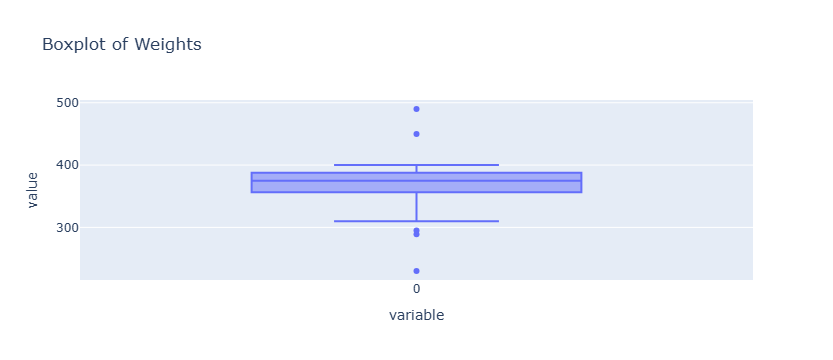

In [2]:
# plot the Boxplot
import plotly.express as px

fig = px.box(weights, title='Boxplot of Weights')
fig.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
برای حذف داده‌های پرت از یک مجموعه داده، ابتدا باید مقادیر پرت را شناسایی کنیم. یکی از روش‌های استاندارد برای این کار، استفاده از <b>چارک‌ها و دامنه بین چارکی (IQR)</b> است. در این روش، ابتدا <b>چارک اول (Q1)</b> (صدک ۲۵٪) و <b>چارک سوم (Q3)</b> (صدک ۷۵٪) را محاسبه می‌کنیم. سپس مقدار <code>IQR</code> را به‌عنوان تفاضل بین این دو چارک به دست می‌آوریم. برای تعیین داده‌های پرت، بازه‌ای مشخص می‌شود که مقدارهای خارج از آن غیرعادی در نظر گرفته می‌شوند: مقادیر کمتر از <code>Q1 - 1.5 × IQR</code> یا بیشتر از <code>Q3 + 1.5 × IQR</code> به‌عنوان داده‌های پرت شناسایی می‌شوند. پس از شناسایی داده‌های پرت، می‌توان آن‌ها را از مجموعه داده حذف کرد. این کار معمولاً با <b>فیلتر کردن مقادیر داخل محدوده مجاز</b> انجام می‌شود.
<br>
برای حذف داده‌های پرت در <code>NumPy</code>، یکی از مهم‌ترین توابعی که می‌توان استفاده کرد، <code>np.percentile()</code> است. این تابع به ما امکان می‌دهد <b>چارک‌های اول (Q1) و سوم (Q3)</b> را محاسبه کنیم که برای تعیین محدوده‌ی داده‌های پرت ضروری هستند. پس از محاسبه این چارک‌ها، می‌توان <b>دامنه بین چارکی (IQR)</b> را با تفاضل <code>Q3 - Q1</code> محاسبه کرد. داده‌هایی که بیرون از بازه‌ی استاندارد <code>Q1 - 1.5×IQR</code> تا <code>Q3 + 1.5×IQR</code> قرار بگیرند، به‌عنوان مقادیر پرت در نظر گرفته می‌شوند. بنابراین داده‌هایی که داخل محدوده مجاز هستند را نگه می‌داریم.
<br>
اگر بخواهیم به ساده‌ترین شکل ممکن داده‌ها را بر اساس مقادیر به‌دست‌آمده <b>فیلتر کنیم</b>، می‌توانیم این کار را به‌صورت زیر انجام دهیم:
</font>
</p>


```python
filtered_data = data[(cond1) & (cond2)]
```


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در این کد، دو شرط اصلی <code>cond1</code> و <code>cond2</code> بررسی می‌کنند که داده‌ها در محدوده‌ی قابل قبول قرار دارند. سپس با استفاده از عملگر <code>&</code> داده‌هایی که <b>هر دو شرط را دارند</b> در لیست جدید باقی می‌مانند و داده‌های پرت حذف می‌شوند. این روش رویکردی کارآمد برای <b>پاک‌سازی داده‌ها</b> و بهبود دقت تحلیل‌های آماری ارائه می‌دهد.
<br>
<br>
پس از حذف داده‌های پرت، لیست جدید را که مقادیر پرت در آن وجود ندارد را در متغیری با نام <code>filtered_weights</code> ذخیره کنید.
</font>
</p>


In [5]:
# TODO: caculate the first and third quartiles and interquartile range (Q1 and Q3 and IQR) and the lower and upper bounds for outlier detection 
# then filter the weights to keep only the ones within the lower and upper bounds
import numpy as np
weights = np.array(weights)
x = np.quantile(weights, 0.25)
y = np.quantile(weights, 0.75)
IQR = y - x

filtered_weights = weights[(weights >= (x - 1.5 * IQR)) & (weights <= (y + 1.5 * IQR))]

print(filtered_weights)

[325 330 389 370 378 385 368 392 374 380 340 350 363 376 390 367 381 379
 372 387 373 369 388 385 390 400]



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در گام بعدی تصمیم‌ می‌گیرد به ازای هر یک از مقادیر پیش‌بینی شده توسط خودش، برای وزن چیپس‌ها مقدار <code>p-value</code> را حساب کند. مقادیر پیشبینی خودش را برای وزن هر بسته چیپس در لیست زیر ذخیره کرده است. 

</font>
</p>


<Axes: ylabel='Density'>

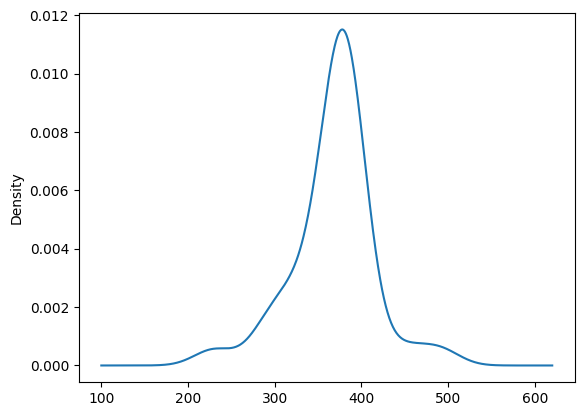

In [9]:
import pandas as pd

pd.Series(weights).plot(kind = 'density')

In [11]:
mass_list = [300, 325, 350, 375, 400]


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
شما بایستی به ازای هر یک از مقادیر پیشنهادی در لیست <code>mass_list</code> مقدار <code>p_value</code> را به کمک آزمون تی تک‌نمونه‌ای حساب کرده و به ترتیب در لیست <code>pvs</code> وارد کنید. سپس محتمل‌ترین وزن‌ها برای بسته‌های چیپس را به ترتیب میزان محتمل بودن در لیست <code>most_possible</code> وارد کنید.
<br>
دقت کنید که نیاز نیست که لیست <code>pvs</code> را مرتب‌سازی (sort) کنید و این لیست باید به همان ترتیب <code>mass_list</code> باشد. ولی باید لیست <code>most_possible</code> حتما بر اساس p-value مرتبط به هر وزن مرتب شود. به صورتی که وزنی که کمترین مقدار p-value را دارد باید در اول لیست باشد و وزن‌هایی با مقادیر p-value بیشتر به ترتیب بعد از آن بیایند.
</font>
</p>


In [15]:
# TODO: calculate the p-values for each mass in mass_list and sort the masses by p-value in a way that the most possible mass comes first
from scipy.stats import ttest_1samp

pvs = [] # p-values for each mass in mass_list
for p in mass_list:
    result = ttest_1samp(filtered_weights, p)
    pvs.append(result.pvalue)

most_possible = [mass for _,mass in sorted(zip(pvs, mass_list))] # sorted masses by p-value


In [16]:
print(f"p-value: {pvs}")
print(f"most probability to reject: {most_possible}")

p-value: [np.float64(7.613216844017476e-17), np.float64(1.0794936503415773e-12), np.float64(1.390671674800206e-06), np.float64(0.6124980223500961), np.float64(1.1484340957895325e-07)]
most probability to reject: [300, 325, 400, 350, 375]


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
بخش ۲
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در این سرزمین دور، برند رقیب جدیدی به نام «چیپی چیپی» وارد بازار می‌شود و رقابت شدیدی با شرکت گران‌فروش ما دارد. مدیر برند «چیپی چیپی» به تازگی متوجه شده‌ است که ممکن است رقیبش از نظر میزان هوای موجود در بسته‌های خود، استانداردهای کیفیتی را رعایت نکرده باشد. 
<br>
از آنجا که برند «چیپی چیپی» این استاندارد را به خوبی رعایت کرده است، از شما می‌خواهد که بررسی کنید که آیا تفاوت معناداری بین درصد حجم هوا در بسته‌های دو برند وجود دارد یا خیر. ما برای شما ۳۰ بسته از برند «چیپی چیپی» و ۳۰ بسته از برند  گران‌فروش را خریداری و درصد حجم هوای هر بسته را اندازه‌گیری کرده‌ایم و نتیجه را در متغیرهای زیر ذخیره کرده‌ایم.

</font>
</p>


In [17]:
chipi_chipi_brand = [41.7, 41.9, 42.4, 42.5, 42.2, 41.7, 41.9, 41.5, 41.6, 42.0, 42.0, 42.0, 42.3, 41.5, 42.2, 42.1, 41.6, 41.6, 42.1, 42.1, 42.2, 41.5, 42.0, 41.6, 42.4]
expensive_brand   = [44.2, 44.5, 44.8, 43.8, 44.2, 44.6, 45.8, 45.2, 45.9, 45.0, 45.0, 44.1, 43.9, 43.9, 44.5, 44.5, 44.7, 45.8, 45.2, 45.1, 45.4, 43.8, 44.2, 43.9, 44.6]

In [25]:
print(len(chipi_chipi_brand))
print(len(expensive_brand))

25
25


<div dir="rtl" style="direction: rtl; text-align: right; font-family: Vazir; font-size: medium; line-height: 200%;">
<font face="vazirmatn" size="3">
برای این کار، از <b>آزمون تی مستقل (Independent t-test)</b> استفاده خواهیم کرد.
نخست بهتر است که فرضیات آزمون را تعریف کنیم:

<ul>
<li><b>فرض صفر (<code>H₀</code>):</b> میانگین درصد حجم هوا در بسته‌های دو برند برابر است (هیچ تفاوت معناداری وجود ندارد).</li>
<li><b>فرض جایگزین (<code>H₁</code>):</b> میانگین درصد حجم هوا در بسته‌های دو برند برابر نیست (تفاوت معناداری وجود دارد).</li>
</ul>
<br>

<p>
سپس با استفاده از تابع <code>ttest_ind</code> از کتابخانه <code>scipy.stats</code>، مقدار <b>t-statistic</b> و <b>p-value</b> را محاسبه کنید. همچنین درصد اطمینان ما ۹۵٪ است که نشان می‌دهد که:
</p>
<ul>
<li>اگر مقدار <b>p-value</b> کمتر از <b>0.05</b> باشد، فرض صفر رد شده و نتیجه می‌گیریم که <b>تفاوت معناداری بین درصد حجم هوا در بسته‌های دو برند وجود دارد.</b></li>
<li>اگر مقدار <b>p-value</b> بیشتر از <b>0.05</b> باشد، فرض صفر رد نمی‌شود و نتیجه می‌گیریم که <b>تفاوت معناداری بین درصد حجم هوا در بسته‌های دو برند مشاهده نشده است.</b></li>
</ul>

<p>
حال ما از شما می‌خواهیم که این تست را با درصد اطمینان ۹۵٪ انجام دهید و نتیجه مربوط به فرض صفر را در متغیر <code>result</code> قرار دهید. برای مثال اگر فرض صفر مورد قبول است، باید مقدار  <code>”ACCEPT”</code> را در متغیر <code>result</code> بریزید و اگر فرض صفر رد شود، باید مقدار  <code>”REJECT”</code> را در متغیر <code>result</code> بریزید.
</p>




<br>
<b>راهنمایی:</b>
<ul>
<li>از تابع <code>ttest_ind</code> استفاده کنید و پارامتر <code>equal_var=False</code> را تنظیم کنید، زیرا ممکن است واریانس دو گروه برابر نباشد.</li>
<li>پس از اجرای آزمون، مقدار <b>t-statistic</b> و <b>p-value</b> را چاپ کنید و تحلیل خود را بر اساس مقدار <b>p-value</b> انجام دهید.</li>
</ul>



</font>
</div>


<Axes: ylabel='Density'>

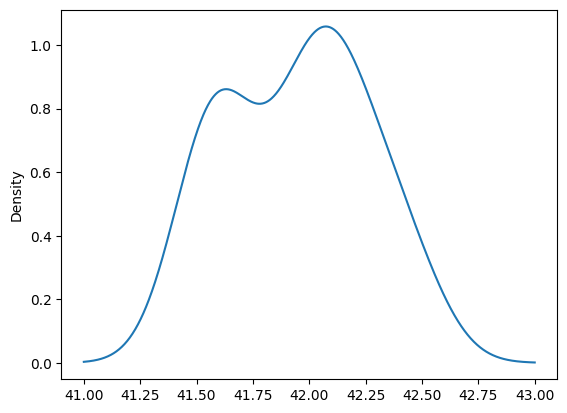

In [19]:
pd.Series(chipi_chipi_brand).plot(kind = 'density')

<Axes: ylabel='Density'>

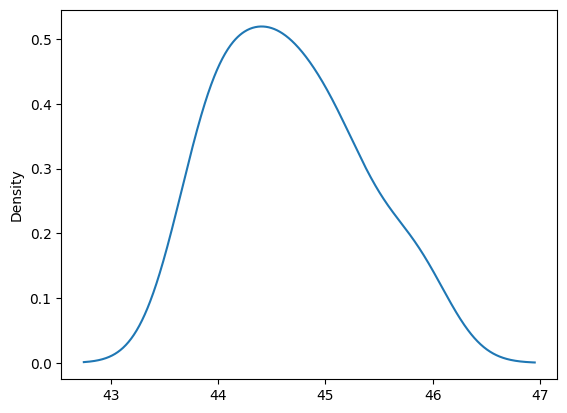

In [20]:
pd.Series(expensive_brand).plot(kind = 'density')

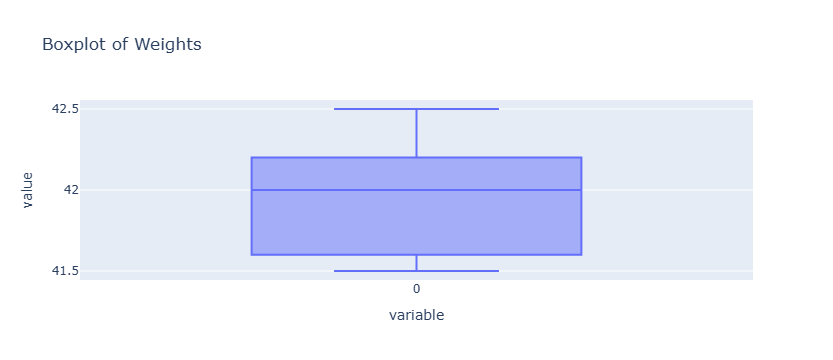

In [21]:
fig = px.box(chipi_chipi_brand, title='Boxplot of Weights')
fig.show()

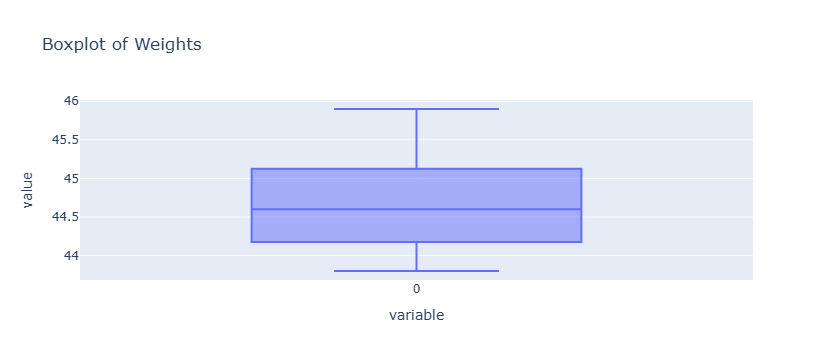

In [22]:
fig = px.box(expensive_brand, title='Boxplot of Weights')
fig.show()

In [26]:
# TODO: Perform the independent t-test and collect the result.
# if the null hypothesis is accepted set the result to "ACCEPT" otherwise set it to "REJECT"
from scipy.stats import ttest_ind

x = ttest_ind(expensive_brand, chipi_chipi_brand, equal_var=False)
print(x)
result = "REJECT"

TtestResult(statistic=np.float64(19.01338720711004), pvalue=np.float64(6.714868859388853e-20), df=np.float64(34.61416310078811))


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
بیشتر بدانید
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
نخست نگاهی به نمودار توزیع دو داده می‌اندازیم. به وضوح تفاوت توزیع دو برند مشخص است.
</font>
</p>


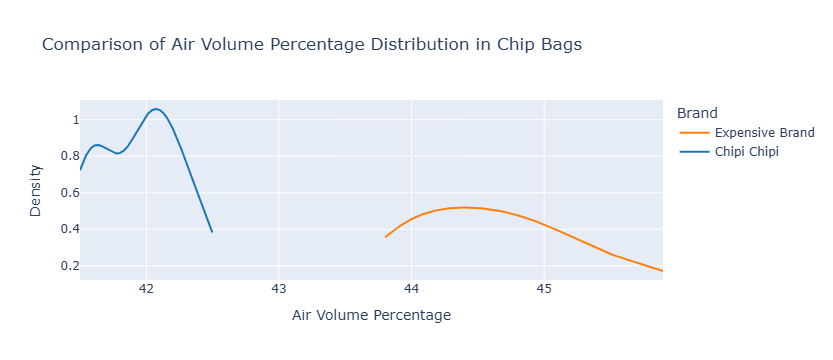

In [23]:
import plotly.figure_factory as ff
from scipy.stats import shapiro, levene

# Create a density plot with Plotly
fig = ff.create_distplot(
    [chipi_chipi_brand, expensive_brand], 
    group_labels=["Chipi Chipi", "Expensive Brand"], 
    show_hist=False, 
    show_rug=False
)

# Update layout for better visualization
fig.update_layout(
    title_text="Comparison of Air Volume Percentage Distribution in Chip Bags",
    xaxis_title="Air Volume Percentage",
    yaxis_title="Density",
    legend_title="Brand"
)

# Show the plot
fig.show()



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
همانطور که در درسنامه نیز اشاره شده است، آزمون تی نیازمند شرایطی است. ما در این تمرین از شما بررسی این شرایط را نخواستیم ولی نحوه‌ی بررسی آن‌ها به صورت زیر است.
</font>
</p>



In [27]:
# check the normality of the data using the Shapiro-Wilk test
shapiro_chipi = shapiro(chipi_chipi_brand)
shapiro_expensive = shapiro(expensive_brand)

print(f"Shapiro-Wilk test for chipi chipi p-value = {shapiro_chipi.pvalue:.4f}")
print(f"Shapiro-Wilk test for Expensive p-value = {shapiro_expensive.pvalue:.4f}")

# check the homogeneity of variances using the Levene's test
levene_test = levene(chipi_chipi_brand, expensive_brand)
print(f"Levene's test: p-value = {levene_test.pvalue:.4f}")

Shapiro-Wilk test for chipi chipi p-value = 0.1000
Shapiro-Wilk test for Expensive p-value = 0.1342
Levene's test: p-value = 0.0024


<p dir="rtl" style="direction: rtl; text-align: justify; line-height: 200%; font-family: vazir; font-size: medium;">
    <font face="vazirmatn" size="3">
        <b>✅ آزمون شاپیرو-ویلک برای بررسی نرمال بودن داده‌ها:</b><br>
        مقدار p-value برای برند چیپی چیپی: ۰.۱۰۰<br>
        مقدار p-value برای برند گران‌فروش: ۰.۱۳۴<br>
        نتیجه: از آنجایی که هر دو مقدار بزرگ‌تر از ۰.۰۵ هستند، می‌توانیم فرض نرمال بودن داده‌ها را بپذیریم.
    </font>
</p>

<p dir="rtl" style="direction: rtl; text-align: justify; line-height: 200%; font-family: vazir; font-size: medium;">
    <font face="vazirmatn" size="3">
        <b>✅ آزمون لوین برای بررسی همگنی واریانس‌ها:</b><br>
        مقدار p-value با ۰.۰۰۲۴ برابر شده است.
        <br>
        نتیجه: مقدار کمتر از ۰.۰۵ است، بنابراین واریانس دو گروه برابر نیست. به همین دلیل در آزمون تی از <code>equal_var=False</code> استفاده شده است.
    </font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [28]:
import zipfile
import joblib

np.savez("answers.npz", filtered_weights = filtered_weights, pvs = pvs, most_possible = most_possible)
joblib.dump(result, "result")


def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["answers.npz", 'result', "init.ipynb"]
compress(file_names)

File Paths:
['answers.npz', 'result', 'init.ipynb']
